In [1]:
# all necessary imports                          USAGE:
import sqlite3 as db                 # database holding information
import matplotlib.pyplot as plt      # graph / chart visuals             
import pandas as pd                  # data manipulation / cleaning / calculations
import numpy as np                   # data manipulation / array creation
import csv                           # file creation and export outside of Notebook

# About The Data

This data is the overview of a custom design shop specializing in shoes. All data has been created using Mockaroo.com and Google Sheets, as well as various csv-json conversion sites.

I have created this project with the idea that someone has a custom shoe design 'side hustle' they tend to. After successfully tending to over 100 customers over the course of approximately three years, I have decided to deep dive into the data to discover insight that may help lead to identifying where my market exists and where to look for investors for related and various other upcoming projects.

Currently, I know I want to focus on answering questions related to profits for the business. 

In the future, there could be a storefront, and this data will help determine where that storefront would potentially be most profitable.

---------------------------------------------------------------------------------------

Some fun nuance exists and assumptions are to be made:

1. Any and all items priced below 250.00 must be assumed to be shoe adornments.

    * My favorite styles for customizable shoes cannot be purchased for less than the standard box price of 250.00.
    * Prices include taxes and shipping respectively

2. We can assume the possibilty exists within the data for the customer address fields to not be the same as the delivery address fields.

   * May not be assumed that 'delivery customer first' will always match 'customer first'.

3. The 'design' column contains only unique values; the assumption exists that each order is an individual, one-of-a-kind shipment that cannot be reproduced.

    * All sales without an SKU are customized shoes.
    * All sales with an SKU are unique hand-designed hardware adornment pieces to decorate a pair of shoes already owned.

## Please ensure the KQ Database has been created

   * In **VSCode** or **PyCharm**, navigate to the the "RunDatabaseFile" and press the green arrow or 'Run' button. 
      * A new file will appear in the left-side window called 'KQBase'
      * In **PyCharm** running the file will also create an ".idea" folder. 
      
      
   * *Alternatively, you may run the cell below, which is a script to automatically run the Database file for you.*
    

In [2]:
!python DatabaseRunFile.py

## Ensure all data has made it to the database

I had three files to manage within my database: customers, deliveries, and profit.

I already know each file contained exactly 100 entries, so 3 x 100 means 300 is the magic number necessary when adding my database table entries together.


In [3]:
# first connect to the database                            ! ++  !  ++  !  
conn = db.connect('KQBase.db')   ##### DO NOT RUN THIS - 

#                                               NOTEBOOK WILL BREAK IN CY:DEMO REPOSITORY

                                                ##### DISPLAY PURPOSES ONLY 
                                                                 
#                                                         ! **  ! **  ! 



# create cursor to execute sql commands
click = conn.cursor()

# I need a query to ask my database how many records exist in my tables respectively
customer_query = ('''SELECT COUNT(*) FROM customer''')
delivery_query = ('''SELECT COUNT(*) FROM delivery''')
profit_query = ('''SELECT COUNT(*) FROM profit''')

# a variable to hold the query execution
cus_count = click.execute(customer_query).fetchall()
del_count = click.execute(delivery_query).fetchall()
prof_count = click.execute(profit_query).fetchall()


# Let's use some string formatting
fmt = "{0}" # string creation; indexed placeholder for item I want returned so that I can format it

# method to keep count of the iterations for query
# for how many times in customer_rows the query executed
for c in cus_count:
    
    cus = int(fmt.format(*c)) #integer casting for easy adding of the variable elsewhere

for d in del_count:
    deliv = int(fmt.format(*d))

for p in prof_count:
    prof = int(fmt.format(*p))
    
    # I need to print the informtion I query for
    print(cus+deliv+prof)

300


## I must tend to my email list

To thank my wonderful investors, I have developed a birthday giveaway in which I email out gift cards. 

I want to ensure I'm not sending out multiple gift cards to the same customer, though.

In [4]:
# python variable to hold the sql query
email_repeat_query = '''SELECT DISTINCT COUNT (email) FROM customer'''

# for every iteration in each selection of the query
for e in click.execute(email_repeat_query).fetchall():
    
    e_repeats = fmt.format(*e)                                      # formatting statement to clean data
    
    print("Must match ", e_repeats, "to <100> exactly.")            # queried count to required count  
    
    print(e_repeats,"unique emails exist within the database.")     # total query count statement

Must match  100 to <100> exactly.
100 unique emails exist within the database.


I have confirmed with the email_repeat_query that I have exactly 100 unique emails accounting for all 100 of my customers.

## I have two types of gifts available:

1. All-purpose gift cards with set balances of 15.00 dollars
2. iTunes gift cards with set balances of 15.00 dollars

To help me split the population between these two options, I choose to make an assumption of which to base my condition upon.

I make an assumption that older generations will enjoy general purpose giftcards more than iTunes-specific giftcards.

In [5]:
# Pretending it's September now, I realize I need to filter by month as well. 
# I'm going to start now, looking at October. 
# Small edits can be made to make notebook re-usable OR monthly queries could be fed into notebook

# sql query
query_october_cards = ('''SELECT first, birthdate, email
                FROM customer
                WHERE (birthdate LIKE '%-10-%') AND (birthdate <= '1994-12-31')
                ORDER BY birthdate''')

# execute query
october_cards = click.execute(query_october_cards)


# style of formatting
em_fmt = "{0}, {1} --> {2}" 

# for each query output selected from fetching all instances of the oct-gift-card-query
for otc in october_cards.fetchall():
    
    #format each line of output
    october_cards = em_fmt.format(*otc)
    
    #print each line of output for user to see
    print(october_cards, end='\n \n')

Raymund, 1930-10-02 --> rpostlethwaite2@nasa.gov
 
Karissa, 1938-10-04 --> kwannes22@sciencedaily.com
 
Tersina, 1941-10-27 --> tyoud1v@joomla.org
 
Christean, 1953-10-18 --> csanchez1d@g.co
 
Jody, 1962-10-04 --> jwillatts0@wordpress.com
 
Therese, 1968-10-08 --> tchristmas4@1und1.de
 
Juliane, 1968-10-29 --> jbirtle25@cnn.com
 
Aaren, 1984-10-12 --> akemmr@patch.com
 
Goddart, 1993-10-12 --> grootc@columbia.edu
 


In [6]:
# Now I'm going to determine the october itunes cards to prepare: 

# sql query
query_oct_itunes = ('''SELECT first, birthdate, email
                FROM customer
                WHERE (birthdate LIKE '%-10-%') AND (birthdate > '1994-12-31')
                ORDER BY birthdate''')

# view query result
for octunes in click.execute(query_oct_itunes).fetchall():
    october_itunes_cards = em_fmt.format(*octunes)
    print(october_itunes_cards)

Merna, 1998-10-19 --> mshakesby1s@flavors.me


In [7]:
# Let's say I wanted to save a record of my October iTunes to a csv as well

# AVAILABLE OPTION FOR LIMITED WRITING OUTPUT
# THIS BOX MUST SPECIFICALLY BE RAN TWICE IN ORDER FOR DOCUMENT TO FULLY POPULATE
# RUNNING BOX ONCE SIMPLY CREATES FILE, RUNNING TWICE POPULATES

#create new file name
ELName = 'info/Oct_iTunes_Email.csv'

# execute query
october_cards = click.execute(query_oct_itunes).fetchall()

# create, open document
# write to that document given specific parameters
iTunesOctober = csv.writer(open(ELName, 'w', newline='\n'),
                         delimiter=' ', lineterminator='\r\n',
                        quoting=csv.QUOTE_NONE, escapechar=' ')

# write headers
#iTunesOctober.writerow(headers)
# write email list
iTunesOctober.writerow(october_cards)

# Output number may act as verification count in VSCode when highlighting entire document at  --  Ln, Col (count)

53

## I need to dig into the data for where to put my storefront

This requires inserting the information from my database, which has already been created using three separate files in csv and json format, and turning the tables into dataframes using pandas.

In [8]:
customer_df = pd.read_sql_query("SELECT * FROM customer", conn)

print(customer_df.head(2))

   customer_id   first      last                     email  \
0            1    Jody  Willatts  jwillatts0@wordpress.com   
1            2  Ginger   McGinny         gmcginny1@hhs.gov   

                  street    city       state  zip_code   birthdate     payment  
0  61293 Karstens Avenue   Miami     Florida     33164  1962-10-04  mastercard  
1     107 Golf View Road  Orange  California     92668  1946-08-24  mastercard  


In [9]:
# Repeat the process for delivery and profit as well
delivery_df = pd.read_sql_query("SELECT * FROM delivery", conn)
profit_df = pd.read_sql_query("SELECT * FROM profit", conn)

### I want an idea of how frequently orders were sold at which price ranges

This will give me an overall idea of the general price range I may be focusing on in the future.

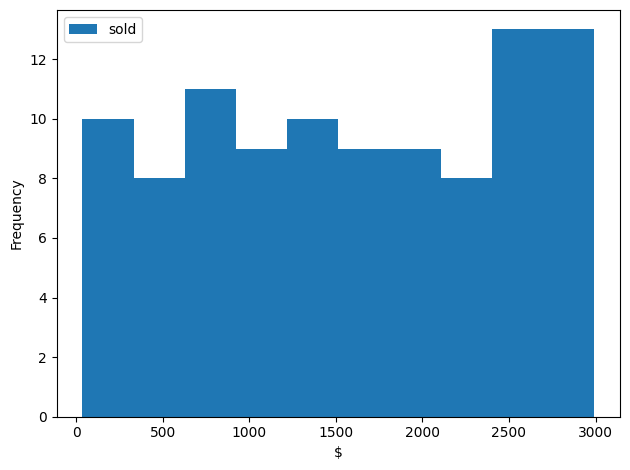

In [10]:
# create profit dataframe
freq_sold_df = profit_df.copy()     # use a copy to keep clean dataframe for this particular problem

# establish histogram that shows which price ranges of purses had the most sales
fs_gram = freq_sold_df.plot(kind= 'hist', x = 'design', y= 'sold')

# label x axis
plt.xlabel('$')

# clean output 
plt.tight_layout()


# This graph displays over the course of 100 customers 
# Each bar shows the cost at which each customer purchased a custom design

Wow. So this tells me I sold over 12 orders that were at both of my highest price ranges. I don't have to worry that I'm overpricing my items, but from this visual I would like to believe that I will also have room to continue selling adornments and easier designs in the future.

### Now to look into my average sale price per state

In [32]:
# establish clean dataframe displaying average price sold per state
state_averages = delivery_df.copy().groupby('state')[['sold']].mean()

# sort that dataframe in order of average price sold 
# round state averages to 2 decimal places
state_averages = round(state_averages.sort_values('sold', ascending=False), 2)

# rename 'Total Profit' column because we just took the average
state_averages.columns = ['Average Price Sold']

display(state_averages)

,Average Price Sold
state,
Georgia,2641.08
Minnesota,2097.40
Florida,1679.62
California,1603.76
Wisconsin,1469.30
Michigan,1401.26
Alabama,926.12
Louisiana,882.35
Oregon,682.00


As far as the average sale price, I'm clearly selling a lot of shoes.

What about my underlying adornment market, though?

I know that anywhere I made a sale at less than 250.00 dollars, I did not sell a pair of shoes but instead a handmade adornment piece for shoes someone already owned.

For adornment pieces, I might have a less standard process than I would follow if simply designing a stock pair of shoes. The customer may have specific colors or characters they request, which is typical, but these pieces are more like construction-set creations than paintings. They are a bit more involved and restrictive given the pieces I have to work with and the requests that may come in.

It's a bit of a niche market, and I have to ensure I have a solid fan base and profit to continue this area of my business.

I also know that within my profit dataset, no SKU available means I bought shoes to design instead. I had a 100 customers total, so let me see how many adornment pieces were ordered out of those.

In [12]:
# create a variable holding a copy dataframe for clean working space
adornments_df = profit_df.copy()

# create dataframe with adornments only and reset index to 0
adornments_df = adornments_df.dropna().reset_index()

# display specific columns (Customer, purse, and price for which the piece sold)
adornments_df = adornments_df.iloc[:, [1, 3, 4, 6]]

# to make it easier to count at a glance, I want to restart the index at 1
adornments_df.index = np.arange(1, len(adornments_df) +1 )

print(adornments_df) #visually less appealing than display

   customer_id  design    sold  bought
1            4     873  208.87   50.23
2           25     454   37.19   10.99
3           40     749   63.65   10.99
4           67     740   50.64   10.99
5           76     436  227.95   50.23
6           89     883  106.53   31.23
7           91     756  132.39   50.23
8           93     838   52.56   10.99
9           94     936  132.34   50.23


I had exactly 9 customers that I sold adornments to! Okay, so definitely not my cash cow currently, but that is almost ten percent of my customer base.

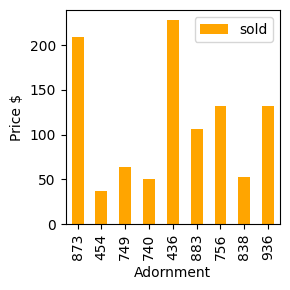

In [13]:
# establish bar graph for overall idea of adornment profitability
adorn_graph = adornments_df.plot(kind="bar", 
                                 x="design", 
                                 y="sold",  
                                 color = 'orange', 
                                 figsize=(3,3)) 


#label x and y
adorn_graph = plt.xlabel('Adornment')
adorn_graph = plt.ylabel('Price $')

# clean output 
plt.tight_layout()




# This bar graph displays:
#   all nine adornment pieces 
#      -- by identification number 
#       and 
#      -- approximately how much each sold for

Judging by this graph, I may have room to increase my prices on my shoe adornment prices. 

Only two sold for over 150.00 dollars, but I might want to consider rounding out my price range of my lowest-priced adornments closer to 100.00 dollars or more. 

### Time to break down adornment piece investors by state

In [14]:
# establish adornment profit
adornment_profit = profit_df.copy().dropna().reset_index()


# create function to do math problem 
def prof_num(sold, bought):
    return sold - bought


# create a dataframe that includes a 'Total Profit' column 
adornment_profit['Total Profit'] = adornment_profit.apply( 
    lambda x: prof_num(x['sold'], x['bought']), axis=1)


# I only want to see customer_id and total profit in my resulting df
adornment_profit = adornment_profit.iloc[:, [1, 9]]


# to make it easier to count at a glance, I want to restart the index at 1
adornment_profit.index = np.arange(1, len(adornment_profit) +1 )


display(adornment_profit)

,customer_id,Total Profit
1,4,158.64
2,25,26.20
3,40,52.66
4,67,39.65
5,76,177.72
6,89,75.30
7,91,82.16
8,93,41.57
9,94,82.11


In [15]:
# I need to grab the state of my customer, held in the customer dataframe
# I only want to include:
#     'customer_id' and 'state' of purchase 
#              --- only from customer df

# I need to combine the previous dataframe and one I created
state_adornment_profit = pd.merge(adornment_profit, 
                                  customer_df.copy()[['customer_id','state']], 
                                  on='customer_id', how='left')

display(state_adornment_profit)

,customer_id,Total Profit,state
0,4,158.64,California
1,25,26.20,Alabama
2,40,52.66,California
3,67,39.65,Alabama
4,76,177.72,Oregon
5,89,75.30,Louisiana
6,91,82.16,Wisconsin
7,93,41.57,Florida
8,94,82.11,Louisiana


In [16]:
# I want to see total profit by state for my adornment pieces
adorn_total_profit_state = state_adornment_profit.copy()

# I want to see the state and total profit, but sum the profit per state
adorn_total_profit_state = adorn_total_profit_state.groupby('state')['Total Profit'].sum()

adorn_total_profit_state # outputs series

state
Alabama        65.85
California    211.30
Florida        41.57
Louisiana     157.41
Oregon        177.72
Wisconsin      82.16
Name: Total Profit, dtype: float64

In [17]:
# I want to add those profit totals together
# first gather the totals into a list
gather_profit_states_adorned = adorn_total_profit_state.to_numpy()


# add all the numbers of the list together
total_adornment_profit = gather_profit_states_adorned.sum()


# create labels
states_list = adorn_total_profit_state.keys().tolist()

print("Total profit from selling shoe adornments amounts to  ------->  $",total_adornment_profit)

Total profit from selling shoe adornments amounts to  ------->  $ 736.01


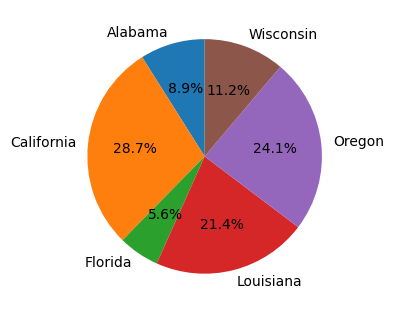

In [18]:
# What's that look like as a pie chart?

st_adorn_pie = plt.pie(gather_profit_states_adorned, 
                       labels=states_list, 
                       startangle=90, 
                       autopct='%.1f%%')


fig = plt.gcf()              # get current figure -> st_adorn_pie pie chart

fig.set_size_inches(4,4)     # set size of pie chart

plt.tight_layout()           # minimize space / adjust padding of visual display

So we know that California, Oregon, and Louisiana are holding my highest-paying adornment investors. If I were looking to market my adornments to grow my clientele, I would start in these areas.

-------------------------------------------------------


This particular visual may entice more questions, such as: 
* Does my adornment market align with my highest-paying investors for shoe designs currently? 
* Would I need to separate focus between marketing campaigns in different locations to keep my products afloat? 
* How would I go about consolidating clientele to provide the ideal location for a storefront?

## Time to calculate total profit from each order

In [19]:
# establish working df
profit = profit_df.copy()


# take care of the missing SKU values
profit = profit.fillna(0)             # I know 0 is an invalid SKU number, so it will work here for now.


# now let's cast sku from float to integer like it should be
profit['sku'] = profit['sku'].astype(int)
    
    
# create dataframe with profit column    
profit['Total Profit'] = profit.apply( 
    lambda x: prof_num(x['sold'], 
                       x['bought']), axis=1) 


profit.head(10) # display only ten results

,customer_id,package,design,sold,payment,bought,sku,brand,Total Profit
0,1,P1,416,1396.85,mastercard,250.00,0,NK,1146.85
1,2,P2,293,1741.29,mastercard,250.00,0,NK,1491.29
2,3,P3,888,476.13,mastercard,250.00,0,NK,226.13
3,4,P4,873,208.87,mastercard,50.23,11003234,,158.64
4,5,P5,627,900.88,mastercard,250.00,0,NK,650.88
5,6,P6,975,742.84,mastercard,250.00,0,NK,492.84
6,7,P7,271,1720.90,visa,250.00,0,NK,1470.90
7,8,P8,157,857.19,mastercard,250.00,0,NK,607.19
8,9,P9,244,1792.40,mastercard,250.00,0,NK,1542.40
9,10,P10,426,1660.81,visa,250.00,0,NK,1410.81


### Quick Overview for card payment types

In [21]:
# hold the payment column in a variable
cards = profit['payment']


# every time 'mastercard' appears in the column, 
# it is counted as a 1 and then added together
# and produced as an integer type
mastercards = int(cards.str.count('mastercard').sum())


# again, 'visa' is counted as a 1
# every time it appears in the payment column
# and all those 1's are added together
# that sum is cast into an integer and held in the visacards variable. 
visacards = int(cards.str.count('visa').sum())


print("My Business Accepted A Total of:", end='\n \n')
print(mastercards, "Mastercards")
print(visacards, "Visa Cards")

My Business Accepted A Total of:
 
90 Mastercards
10 Visa Cards


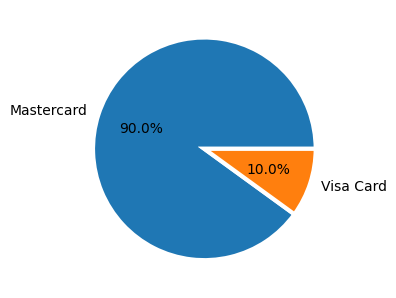

In [22]:
# Cannot insert magical numbers. 
# Must convert int values from block above into matplotlib friendly format

# create list for np array
card_list = []

# insert numeric values for the array
card_list = [mastercards, visacards]

# create pie chart labels
labels = ['Mastercard', 'Visa Card']


# create array
card_chart = np.array(card_list)

# make pie chart smaller
fig, ax = plt.subplots(figsize=(4, 4))

# show card chart array with labels and percentages
plt.pie(card_chart, labels=labels, autopct='%.1f%%',
        
        # display wedge separation 
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'w'},
        
        # text pieces
       textprops={'size': 'medium', 'color': 'k'})

# remove extra text
plt.tight_layout()

In [23]:
# create clean new variable to hold dataframe
profit_statement = profit

# display only necessary columns
profit_statement = profit_statement.iloc[:, [0, 2, 6, 8]]

display(profit_statement)

,customer_id,design,sku,Total Profit
0,1,416,0,1146.85
1,2,293,0,1491.29
2,3,888,0,226.13
3,4,873,11003234,158.64
4,5,627,0,650.88
...,...,...,...,...
95,96,376,0,1025.94
96,97,289,0,649.91
97,98,831,0,821.91
98,99,214,0,986.24


### Again, I need an idea of which states the income came from.

In [24]:
# I need to grab the state of my customer, held in another dataframe
# I only want to include 'customer_id' and 'state' of purchase only from that customer dataframe
# I need to combine the previous dataframe and one I just created
total_profit_by_state = pd.merge(profit_statement, 
                                 customer_df.copy()[['customer_id','state']], 
                                 on='customer_id', how='left')

display(total_profit_by_state)

,customer_id,design,sku,Total Profit,state
0,1,416,0,1146.85,Florida
1,2,293,0,1491.29,California
2,3,888,0,226.13,Florida
3,4,873,11003234,158.64,California
4,5,627,0,650.88,Florida
...,...,...,...,...,...
95,96,376,0,1025.94,Florida
96,97,289,0,649.91,California
97,98,831,0,821.91,Florida
98,99,214,0,986.24,Florida


#### I decide I want to condense the profit table into a document I can evaluate later.

In [25]:
# send to csv
total_profit_by_state.to_csv(r'info/total_profit_by_state.csv', 
                             index= False) # do not include index in file

### I want a deeper look at profit by state

In [33]:
# which state was the item ordered from
state_pivot = total_profit_by_state.copy()



# create a pivot table grouping 'Total Profit' by states
# give me an average of the sales for that state
# cast the result into a number rounded up to two decimal points
state_pivot = round(state_pivot.groupby('state')[['Total Profit']].mean(), 2)



# sort by profit instead of alphabetical order of states
state_pivot = state_pivot.sort_values('Total Profit', ascending=False)

# rename 'Total Profit' column because we just took the average
state_pivot.columns = ['Average Profit']

# list of states in order of most profitable to least
display(state_pivot)

,Average Profit
state,
Georgia,2141.08
Minnesota,1691.15
Florida,1325.80
California,1282.68
Michigan,1101.26
Wisconsin,944.18
Alabama,755.79
Louisiana,684.67
Oregon,406.88


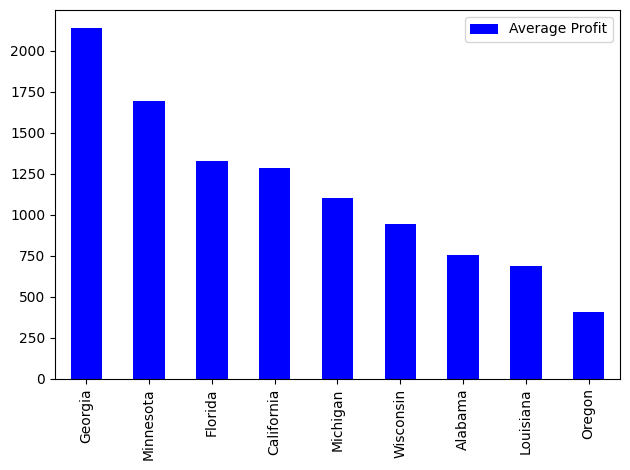

In [30]:
# establish bar graph for overall idea of adornment profitability
state_pivot_graph = state_pivot.plot(kind='bar',
                                     color='b',    # set blue color
                                     xlabel='')    # clear state label from x-axis

# clean output 
plt.tight_layout()

# This bar graph displays each state I did business in
# For each state, approximately how much profit was made
#   combined from:
#       custom designs 
#    and 
#       shoe adornments

Well, that is NOT California, Oregon, or Louisiana in my top three when we add shoe designs back in the mix. It appears that I may have two separate markets in varying areas. California is still pulling strong, but it may take some more marketing techniques to raise brand awareness and grow the investor base.

# Tableau Dashboard

To dig in deeper to the data so I can answer ambitious questions regarding storefront placements, I have created a sample Tableau Dashboard from the data available. It will give an idea of the timeline of sales as well.

[Click here to be directed to the Public Workbook](https://public.tableau.com/app/profile/jodie.mullins/viz/DemoDashboardPreview/PinPointAreas)

In [34]:
conn.close() #close database

# REMINDER

The final project has a .py file creating a database from three separate file sources to get to the information achieved in this notebook. I had specifically arranged the final project (that is not yet complete as of 10/ 28/ 2023 hence this preview) in such a way to be as visually appealing as possible, so removing unnecessary query script seemed appropriate.